In [1]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import pickle
from astropy.coordinates import SkyCoord, match_coordinates_3d, match_coordinates_sky
import sys
import emcee
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.table import Table, QTable, hstack, vstack
from astropy import units as u
import corner
from astropy.coordinates import SkyCoord, match_coordinates_3d
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)
import iminuit
from iminuit import Minuit
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
import analysis_Mass_Richness_relation as analysis

In [2]:
import analysis_WL_mean_mass as analysisM
case = analysisM.analysis_WL

In [3]:
import glob
file = glob.glob('/pbs/throng/lsst/users/cpayerne/CLMassDC2/notebooks/plots/WL_mass_richness_relation/*')
file_plot = []
for f in file:
    if 'z_lower_' in f:
        file_plot.append(f)

In [4]:
id_analysis = []
p = []
p_err = []
for f in file_plot:
    if f == None: continue
    data = np.load(f, allow_pickle=True)
    param = np.mean(data['chains'][70000:], axis=0)
    param_err = np.std(data['chains'][70000:], axis=0)
    id_analysis.append(data['analysis']['ID'])
    p.append(param)
    p_err.append(param_err)


In [5]:
sample_fiducial = np.load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/notebooks/plots/fiducial_sample.txt.npy', allow_pickle = True)

In [6]:
log10M_true, G_true, F_true, s_true = np.mean(sample_fiducial, axis = 0)
log10M_true_err, G_true_err, F_true_err, s_true_err = np.std(sample_fiducial, axis = 0)

In [7]:
log10M_true, G_true, F_true

(14.143400937625936, -0.2928247304142298, 0.8155885265688505)

[False, False]
[False, False]
[False, False]
[False, True]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[True, False]
[False, False]
[False, False]
[False, True]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[True, False]
[False, False]
[False, False, False, True]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, True, False]
[False, True, False, False]
[True, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False]
[False, True, False]
[False, False, False]
[False, False, False]
[False, False, True]
[True, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]
[False, False, False]


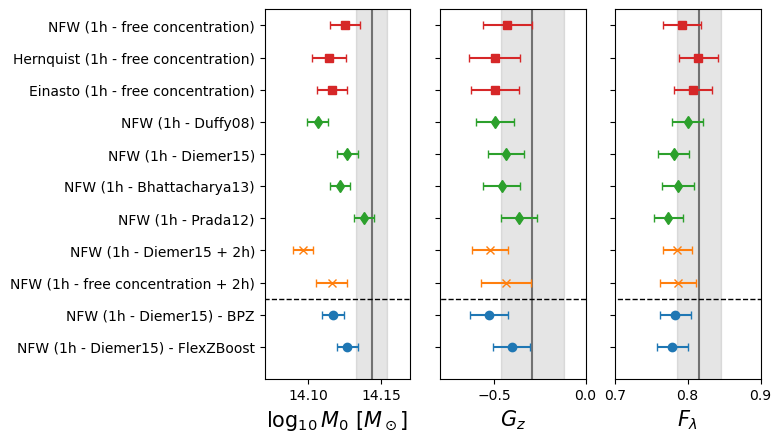

In [44]:
fig, ax = plt.subplots(1, 3, sharey = True)
name_analysis = ['photoz', 'two_halo_term', 'cM', 'halo_model']
color = ['C0', 'C1', 'C2', 'C3']
marker = ['o','x','d','s']
for i, analysis_ in enumerate(name_analysis):
        list_of_possibles_indexes = [c['ID'] for c in case[analysis_]]
        name_plot = [c['name_analysis'] for c in case[analysis_]]
        for j in range(len(file_plot)):
            id_res = id_analysis[j]
            maskid = [l == id_res for l in list_of_possibles_indexes]
            print(maskid)
            if len(np.array(maskid)[np.array(maskid)==True]) == 0: 
                continue
            else: 
                name_plot_ = np.array(name_plot)[maskid][0]
            ax[0].errorbar(np.array(p[j])[0], name_plot_, xerr = np.array(p_err[j])[0], fmt=' ', color = color[i], marker = marker[i], capsize=3,)
            ax[1].errorbar(np.array(p[j])[1], name_plot_, xerr = np.array(p_err[j])[1], fmt=' ', color = color[i], marker = marker[i], capsize=3,)
            ax[2].errorbar(np.array(p[j])[2],name_plot_, xerr = np.array(p_err[j])[2], fmt=' ', color = color[i], marker = marker[i], capsize=3,)
ax[0].set_xlabel(r'$\log_{10}M_{0}\ [M_\odot]$', fontsize=15)
ax[1].set_xlabel(r'$G_z$', fontsize=15)
ax[2].set_xlabel(r'$F_\lambda$', fontsize=15)

ax[0].set_xlim(14.07, 14.17)
ax[1].set_xlim(-.8, 0)
ax[2].set_xlim(.7, .9)

ax[0].set_ylim(-1, 10.5)

x = np.linspace(-1000, 1000, 100)
ax[0].plot(x, 1.5+0*x, '--k', lw=1)
ax[1].plot(x, 1.5+0*x, '--k', lw=1)
ax[2].plot(x, 1.5+0*x, '--k', lw=1)

#fiducial
ax[0].vlines(log10M_true, -2, 20, color = 'k', zorder=0, alpha = .5)
ax[1].vlines(G_true, -2, 20, color = 'k', zorder=0, alpha = .5)
ax[2].vlines(F_true, -2, 20, color = 'k', zorder=0, alpha = .5)

x = np.linspace(log10M_true-log10M_true_err, log10M_true+log10M_true_err, 100)
ax[0].fill_between(x, 0*x-20, 0*x + 20, color = 'k',alpha = .1, zorder=0)

x = np.linspace(G_true-G_true_err, G_true+G_true_err, 100)
ax[1].fill_between(x, 0*x-20, 0*x + 20, color = 'k',alpha = .1, zorder=0)

x = np.linspace(F_true-F_true_err, F_true+F_true_err, 100)
ax[2].fill_between(x, 0*x-20, 0*x + 20, color = 'k',alpha = .1, zorder=0)

plt.savefig('scaling_relation_DC2.png', bbox_inches='tight', dpi=300)